# Численная интерполяция

## Вариант 20

> <span style="font-style:normal; font-size:12pt;"> 
    <p> Построить численную интерполяцию функции y = f(x) на открезке [a, b] в точках x*, не совпадающих с узлами интерполяции, используя интерполяционный полином Лагранжа. В качестве x* выбрать середины отрезков между интерполяционными узлами. В качестве узлов интерполяции по пространственной переменной использовать: </p>
    <p> <pre> а) - равномерный шаг h между узлами </pre> </p>
    <p> <pre> б) - узлы Чебышева                  </pre> </p> </span>

\begin{equation}
f(x) = ln(2 + x*(1 + cos(x))), \quad {x \in [0,10]}
\end{equation}

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# исходная функция
def f(x):
    return np.log(2 + x * (1 + np.cos(x)))

In [3]:
# интервал [0, 10]
a = 0
b = 10

In [4]:
# исходная функция (точки для построения гладкого графика)
x_plot = np.linspace(a, b, 1000)
y_plot = [f(x) for x in x_plot]

### а) Равномерный шаг h между узлами

In [5]:
# интерполянта
def F1(x, x_plot, y_plot):
    sum = 0
    
    for i in range(len(x_plot)):
        mult = 1
        
        for j in range(len(x_plot)):
            if i != j:
                mult *= (x - x_plot[j]) / (x_plot[i] - x_plot[j])
                
        sum += y_plot[i] * mult
    
    return sum

In [6]:
# шаг узлов интерполяции
h = float(input("Input step h: "))

Input step h: 0.5


In [7]:
# узлы интерполяции
x1_plot = np.linspace(a, b, int(np.trunc((b - a) / h)))
y1_plot = [f(x) for x in x1_plot]

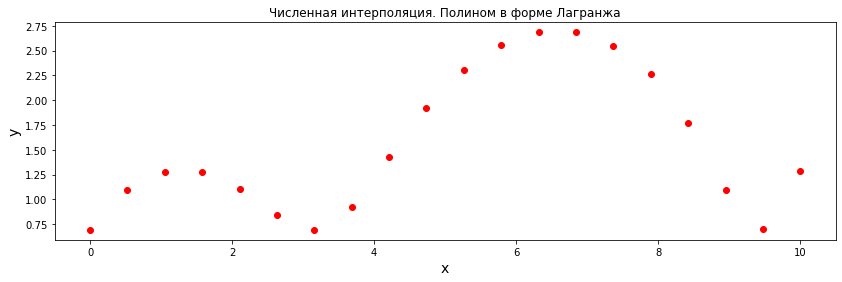

In [8]:
# задание графика
fig, ax = plt.subplots(figsize=(14, 4))
ax.set_title("Численная интерполяция. Полином в форме Лагранжа")
ax.scatter(x1_plot, y1_plot, c='r')

ax.set_xlabel("x", fontsize=14)        
ax.set_ylabel("y", fontsize=14)

plt.show()

In [9]:
# интерполянта (точки для построения гладкого графика)
X0_plot = np.linspace(a, b, 1000)
Y0_plot = [F1(x, x1_plot, y1_plot) for x in X0_plot]

In [10]:
# задание исследуемых точек
X1_plot = []

for i in range(0, len(x1_plot) - 1):
    X1_plot.append(x1_plot[i])
    x_ = (x1_plot[i] + x1_plot[i + 1]) / 2
    X1_plot.append(x_)

X1_plot.append(b)

Y1_plot = [F1(x, x1_plot, y1_plot) for x in X1_plot]

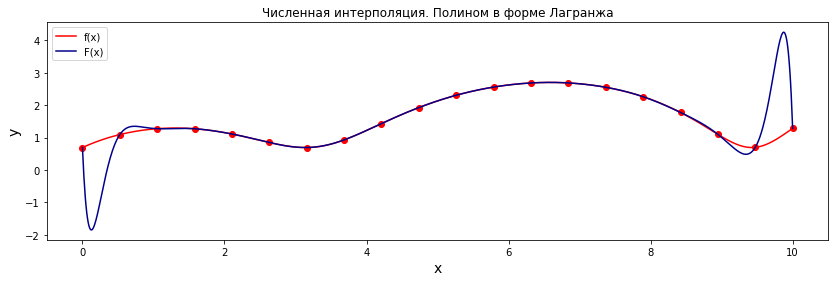

In [11]:
# общий график
fig, ax = plt.subplots(figsize=(14, 4))
ax.set_title("Численная интерполяция. Полином в форме Лагранжа")

ax.scatter(x1_plot, y1_plot, c = 'r')
ax.plot(x_plot, y_plot, color="red", label='f(x)')
ax.plot(X0_plot, Y0_plot, color="darkblue", label='F(x)')

ax.set_xlabel("x", fontsize=14)        
ax.set_ylabel("y", fontsize=14)

ax.legend()

plt.show()

In [12]:
# Значение интерполянты в заданных по условию точках

d = {'x*': [], 'F(x*)': []}

for x, y in zip(X1_plot, Y1_plot):
    d['x*'].append(x)
    d['F(x*)'].append(y)

#     print("(x* = {0:.4f}, F(x*) = {1:.4f})".format(x, y))

print("Step: ", h)

df = pd.DataFrame(data=d)
df

Step:  0.5


,x*,F(x*)
0,0.000000,0.693147
1,0.263158,-0.829552
2,0.526316,1.092394
3,0.789474,1.340032
4,1.052632,1.273681
5,1.315789,1.279880
6,1.578947,1.271466
7,1.842105,1.208875
8,2.105263,1.109512
9,2.368421,0.985026


#### Погрешность интерполирования

> <span style="font-style:normal; font-size:12pt;"> 
Погрешность интерполяционного полинома в исследуемых точках </span>

In [13]:
e = 0                                    # e - погрешность

for i in range(len(X1_plot)):
    y_ = f(X1_plot[i])                   # вычисление значения исходной функции в исследуемых точках
    
    if np.abs(y_ - Y1_plot[i]) > e:
        e = np.abs(y_ - Y1_plot[i])

print(f"Вывод: погрешность интерполяционного полинома в исследуемых точках e = {e}")

Вывод: погрешность интерполяционного полинома в исследуемых точках e = 2.1305422807276546


### Подытог

In [14]:
print("Шаг узлов интерполяции h: ", h)
print("Погрешность e: ", e)

Шаг узлов интерполяции h:  0.5
Погрешность e:  2.1305422807276546


> <span style="font-style:normal; font-size:12pt;"> 
    > <p> 1. Погрешность уменьшается с уменьшением шага узлов интерполяции </p> 
    > <p> 2. Возможная причина вобросов на концах:                         </p>
    > <p> <pre> а) выбор вычислительного алгоритма                   </pre></p> 
    > <p> <pre> б) выбор узлов интерполяции (феномен Рунге)          </pre></p></span>

### б) Узлы Чебышева

In [15]:
# приближенная функция
def F2(x, x2_plot, y2_plot):
    sum = 0
    
    for i in range(len(x2_plot)):
        mult = 1
        
        for j in range(len(x2_plot)):
            if i != j:
                mult *= (x - x2_plot[j]) / (x2_plot[i] - x2_plot[j])
                
        sum += y2_plot[i] * mult
    
    return sum

In [16]:
# количество узлов Чебышева
n = int(input("Input nodes count n: "))

Input nodes count n: 50


In [17]:
# узлы интеполяции
x2_plot = []

for i in range(n):
    x_ = (a + b) / 2 + (b - a) / 2 * np.cos((2 * (i + 1) - 1) / (2 * n) * np.pi )
    x2_plot.append(x_)

y2_plot = [f(x) for x in x2_plot]

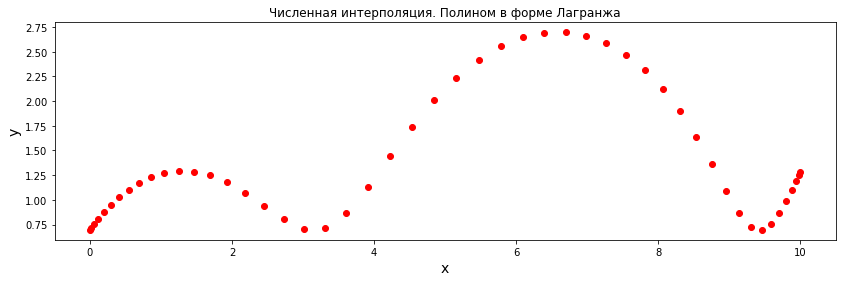

In [18]:
# задание графика
fig, ax = plt.subplots(figsize=(14, 4))
ax.set_title("Численная интерполяция. Полином в форме Лагранжа")
ax.scatter(x2_plot, y2_plot, c='r')

ax.set_xlabel("x", fontsize=14)        
ax.set_ylabel("y", fontsize=14)

plt.show()

In [19]:
# интерполянта (точки для построения гладкого графика)
X_plot = np.linspace(a, b, 1000)
Y_plot = [F2(x, x2_plot, y2_plot) for x in X_plot]

In [20]:
# задание исследуемых точек
X2_plot = []

for i in range(0, len(x2_plot) - 1):
    X2_plot.append(x2_plot[i])
    x_ = (x2_plot[i] + x2_plot[i + 1]) / 2
    X2_plot.append(x_)

X2_plot.append(x2_plot[len(x2_plot) - 1])

Y2_plot = [F2(x, x2_plot, y2_plot) for x in X2_plot]

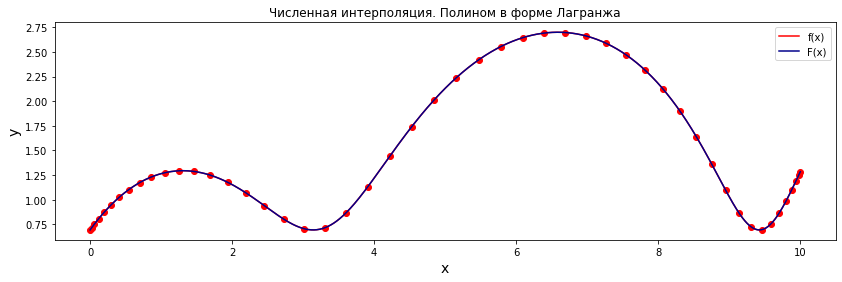

In [21]:
# общий график
fig, ax = plt.subplots(figsize=(14, 4))
ax.set_title("Численная интерполяция. Полином в форме Лагранжа")

ax.scatter(x2_plot, y2_plot, c = 'r')
ax.plot(x_plot, y_plot, color="red", label='f(x)')
ax.plot(X_plot, Y_plot, color="darkblue", label='F(x)')

ax.set_xlabel("x", fontsize=14)        
ax.set_ylabel("y", fontsize=14)

ax.legend()

plt.show()

In [24]:
# Значение интерполянты в заданных по условию точках

d = {'x*': [], 'F(x*)': []}

for x, y in zip(X2_plot, Y2_plot):
    d['x*'].append(x)
    d['F(x*)'].append(y)

#     print("(x* = {0:.4f}, F(x*) = {1:.4f})".format(x, y))

df = pd.DataFrame(data=d)
df

,x*,F(x*)
0,9.997533,1.279682
1,9.987671,1.264397
2,9.977810,1.249137
3,9.958126,1.218786
4,9.938442,1.188622
...,...,...
94,0.061558,0.752830
95,0.041874,0.734153
96,0.022190,0.715092
97,0.012329,0.705398


#### Погрешность

In [25]:
e = 0                                    # e - погрешность

for i in range(len(X2_plot)):
    y_ = f(X2_plot[i])                   # вычисление значения исходной функции в исследуемых точках
    
    if np.abs(y_ - Y2_plot[i]) > e:
        e = np.abs(y_ - Y2_plot[i])
        
print(f"Вывод: погрешность интерполяционного полинома в исследуемых точках e = {e}")

Вывод: погрешность интерполяционного полинома в исследуемых точках e = 4.67590416963759e-06


### Подытог

In [26]:
print("Количество узлов Чебышева n: ", n)
print("Погрешность e: ", e)

Количество узлов Чебышева n:  50
Погрешность e:  4.67590416963759e-06


> <span style="font-style:normal; font-size:12pt;"> 
    <p> 1. Погрешность уменьшается с увеличением числа узлов Чебышева. </p>
    <p> 2. Узлы Чебышева - минимизация ошибки интерполяции             </p></span>

### Вывод

> <span style="font-style:normal; font-size:12pt;"> 
    В данной работе проведенно исследование зависимости точности приближения интерполяционного полинома в форме Лагранжа от количества исходных узлов интерполяции и их взаимного распределения узлов интерполяции в заданном интервале. </span>

### Доп. задание*

> <span style="font-style:normal; font-size:12pt;"> 
  <p> 1. Проиллюстрировать асимптотику постоянной Лебега для последовательности чебышовских сеток на заданном интервале. </p>
  <p> 2. Зависимость постоянной Лебега (общий максимум для наших точек) от выбранного количества точек чебышева (для данной функции) </p>
</span>

In [27]:
def Generate_nodes(n):
    x_plot = []

    for i in range(n):
        x_ = (a + b) / 2 + (b - a) / 2 * np.cos((2 * (i + 1) - 1) / (2 * n) * np.pi )
        x_plot.append(x_)
                
    return x_plot

In [28]:
def Fi(x, cheb_nodes):
    sum = 0
    
    for i in range(len(cheb_nodes)):
        mult = 1
        
        for j in range(len(cheb_nodes)):
            if i != j:
                mult *= abs((x - cheb_nodes[j]) / (cheb_nodes[i] - cheb_nodes[j]))
                
        sum += mult
    
    return sum

In [29]:
def Lebeg(n, x_plot):
    
    cheb_nodes = Generate_nodes(n)    
    
    results = []
    
    for x in x_plot:
        results.append(Fi(x, cheb_nodes))
        
    return max(results)

> <span style="font-style:normal; font-size:12pt;"> 
В случае чебышовских сеток для постоянной Лебега справедлива следующая оценка: </span>

$$
\begin{equation}
\Lambda_n \sim \frac{2}{\pi} ln(n + 1) \\
\frac{2}{\pi} ln(n + 1) + \alpha \leq \Lambda_n \leq \frac{2}{\pi} ln(n + 1) + 1, \quad \alpha = 0.9625...
\end{equation}
$$

In [30]:
alpha = 0.9625             # постоянная пропорциональности

In [31]:
def Sup(i):
    return 2/np.pi * np.log(i + 1) + 1

In [32]:
def Inf(i):
    return 2/np.pi * np.log(i + 1) + alpha

In [33]:
# Оценка сверху для последовательности чебышовских сеток
def Func(i):
    return 8 + (4 / np.pi * np.log(i))

> <span style="font-style:normal; font-size:12pt;"> 
(!) В качестве интервала возьмем исходный интервал [a, b] </span>

In [34]:
print(f"[{a}, {b}]")

[0, 10]


In [35]:
# число точек
n = int(input("Input count of points n: "))

Input count of points n: 100


In [36]:
N_plot = np.arange(1, n)
Y_plot_inf = [Inf(i) for i in N_plot]
Y_plot_sup = [Sup(i) for i in N_plot]
Y_plot_func = [Func(i) for i in N_plot]

> <span style="font-style:normal; font-size:12pt;"> 
Постоянная Лебега для исходных точек </span>


In [37]:
# Исходные точки численной интерполяции
   
# Узлы Чебышева
print("Узлы Чебышева")
for x in X2_plot:
    print("x* = {0:.4f}".format(x))

Узлы Чебышева
x* = 9.9975
x* = 9.9877
x* = 9.9778
x* = 9.9581
x* = 9.9384
x* = 9.9090
x* = 9.8796
x* = 9.8405
x* = 9.8015
x* = 9.7529
x* = 9.7044
x* = 9.6466
x* = 9.5888
x* = 9.5219
x* = 9.4550
x* = 9.3794
x* = 9.3037
x* = 9.2196
x* = 9.1354
x* = 9.0431
x* = 8.9508
x* = 8.8507
x* = 8.7506
x* = 8.6430
x* = 8.5355
x* = 8.4210
x* = 8.3066
x* = 8.1855
x* = 8.0645
x* = 7.9375
x* = 7.8104
x* = 7.6778
x* = 7.5452
x* = 7.4076
x* = 7.2700
x* = 7.1278
x* = 6.9857
x* = 6.8397
x* = 6.6937
x* = 6.5443
x* = 6.3950
x* = 6.2428
x* = 6.0907
x* = 5.9364
x* = 5.7822
x* = 5.6264
x* = 5.4705
x* = 5.3138
x* = 5.1571
x* = 5.0000
x* = 4.8429
x* = 4.6862
x* = 4.5295
x* = 4.3736
x* = 4.2178
x* = 4.0636
x* = 3.9093
x* = 3.7572
x* = 3.6050
x* = 3.4557
x* = 3.3063
x* = 3.1603
x* = 3.0143
x* = 2.8722
x* = 2.7300
x* = 2.5924
x* = 2.4548
x* = 2.3222
x* = 2.1896
x* = 2.0625
x* = 1.9355
x* = 1.8145
x* = 1.6934
x* = 1.5790
x* = 1.4645
x* = 1.3570
x* = 1.2494
x* = 1.1493
x* = 1.0492
x* = 0.9569
x* = 0.8646
x* = 0.7804
x*

In [38]:
L_plot= [Lebeg(i, X2_plot) for i in N_plot]

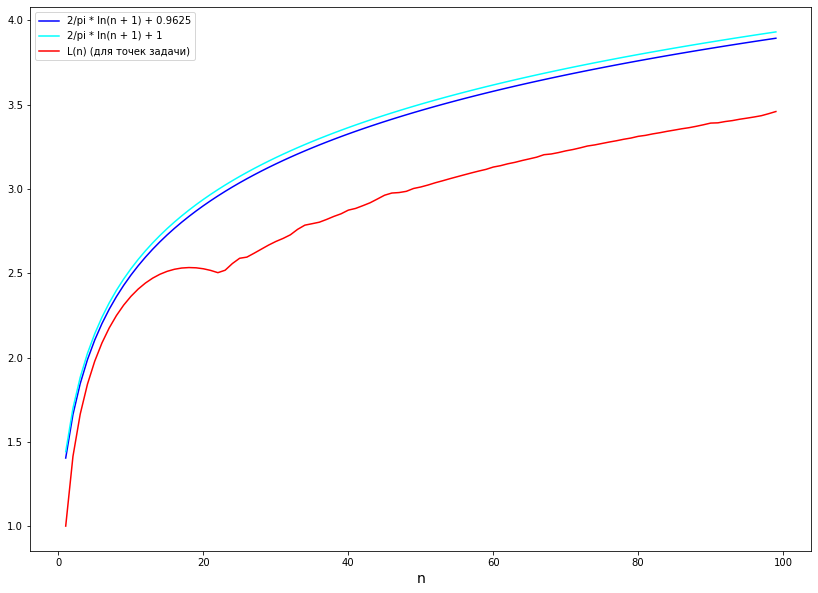

Количество исходных точек Чебышева: 99
Рассматриваемый промежуток для значения n: [1, 100 ]


In [40]:
# график
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(N_plot, Y_plot_inf, color="blue", label='2/pi * ln(n + 1) + 0.9625')
ax.plot(N_plot, Y_plot_sup, color="cyan", label='2/pi * ln(n + 1) + 1')
# ax.plot(N_plot, Y_plot_func, color="black", label='8 + (4 / pi * ln(n))')
ax.plot(N_plot, L_plot, color="red", label='L(n) (для точек задачи)')

ax.set_xlabel("n", fontsize=14)        

ax.legend()

plt.show()

print('Количество исходных точек Чебышева:', len(X2_plot))
print('Рассматриваемый промежуток для значения n: [1,', n, ']')